<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера v1:</b>
    
<b>Общее впечатление:</b> 
    
- У тебя получилась отличная работа, поздравляю! Очень чистый код и структурированный подход к решению задачи. 
- Осталось исправить совсем чуть-чуть для сдачи проекта (буду также рад исправлениям желтых:):
    - Поправить пути файлов.
    - Поправить объединение таблиц.
    
Буду ждать новую версию на повторную проверку. Успехов!
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Привет, Дмитрий!</div>

<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера v2:</b>
    
Дмитрий привет!  Очень рад, что нашел силы и время внести улучшения в свой проект!
    
Было интересно его проверять и осталось только пожелать тебе успехов на следующих спринтах 🍀
    

PS: Если наскучит ~~нетфликс~~ кинопоискHD, то могу порекомендовать крутые лекции по стат анализу тут: - https://www.youtube.com/watch?v=enpPFqcIFj8&list=PLlb7e2G7aSpRb95_Wi7lZ-zA6fOjV3_l7
 
    
</div>

# Рекламный бюджет. Описание проекта

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- - минута разговора: 3 рубля
- - сообщение: 3 рубля
- - 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- - минута разговора: 1 рубль
- - сообщение: 1 рубль
- - 1 Гб интернет-трафика: 150 рублей

**Примечание**

Компания всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Описание данных
### Таблица users (информация о пользователях):
- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `tariff` — название тарифного плана
### Таблица calls (информация о звонках):
- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок
### Таблица messages (информация о сообщениях):
- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение
### Таблица internet (информация об интернет-сессиях):
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя
### Таблица tariffs (информация о тарифах):
- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# Обзор данных

### Импорт данных

Откроем файлы с данными и изучим общую информацию.

In [2748]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

from scipy import stats as st
from datetime import date


### Обзор данных по таблицам

In [2750]:
table_list = [df_calls, df_internet, df_messages, df_users, df_tariffs]
table_name_list = ['df_calls', 'df_internet', 'df_messages', 'df_users', 'df_tariffs']
for index in range(len(table_list)):
    print()
    print('----------------------------',table_name_list[index],'----------------------------')
    table_list[index].info()
    display(table_list[index].head())
    print()
    print()



---------------------------- df_calls ----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000





---------------------------- df_internet ----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000





---------------------------- df_messages ----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000





---------------------------- df_users ----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra





---------------------------- df_tariffs ----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Итог по обзору данных

*Для исследования пользователей предоставлено 5 таблиц, каждая из которых имеет часть сведений о тарифах и пользователях. Данные в хорошем состоянии, без пропусков (за исключением churn_datechurn_date в df_users) При необходимости, некоторые из них можно объединить по id пользователей. Но для этого нужно будет учесть тип операции, тариф, разный обьем строк и уникальные столбцы.*

# Предобработка данных

## Приведение данных к нужным типам

Мы будем вести расчет данных по месяцам. Следовательно, нам нужны столбцы в формате даты. Получить данные о месяцах. Приведем данные к нужным типам.

In [2751]:
# Предобработка дат из object в datetime64 методом to_datetime() Пример из таблицы: 2018-07-25
df_calls.call_date = pd.to_datetime(df_calls.call_date, format='%Y-%m-%d').apply(lambda x: x.month)
df_users.reg_date = pd.to_datetime(df_users.reg_date, format='%Y-%m-%d').apply(lambda x: x.month)
df_internet.session_date = pd.to_datetime(df_internet.session_date, format='%Y-%m-%d').apply(lambda x: x.month)
df_messages.message_date = pd.to_datetime(df_messages.message_date, format='%Y-%m-%d').apply(lambda x: x.month)
df_users.churn_date = pd.to_datetime(df_users.churn_date, format='%Y-%m-%d').apply(lambda x: x.month)


В примечании указано что расчет интернет трафика учитывается в гигабайтах. Исправим таблицу.

In [2752]:
df_tariffs = df_tariffs.rename(columns = {'tariff_name':'tariff'})
df_tariffs = df_tariffs.rename(columns={'mb_per_month_included':'gb_per_month_included'})
df_tariffs['gb_per_month_included'] = df_tariffs['gb_per_month_included'].apply(lambda x: int(x/1024))
df_tariffs


,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


**Создаем шаблон общей таблицы. Таблица пользователей и их тарифов по месяцам**

Таблица будет учитывать все месяцы и всех пользователей независимо от того чем и когда они пользовались или не пользовались.

In [2753]:
data_users = pd.Series(df_users['user_id'].unique())
data_users_v1 = []
for value in data_users:
    data_users_v1 += [value]*12

data_month = [1,2,3,4,5,6,7,8,9,10,11,12]*500

data  = pd.DataFrame({
                    'date':data_month,
                    'user_id':data_users_v1
                    })

user_id_month = []
for i in range(len(data)):
    user_id_month.append(str(data.user_id[i])+'_'+str(data.date[i])) 
    
data['user_id_month'] = user_id_month

users_with_tariffs = data.merge(df_users, on='user_id', how='inner').merge(df_tariffs, on='tariff', how='inner')


**Количество сделанных звонков и израсходованных минут разговора по месяцам:**  

In [2754]:
df_calls['id'] = df_calls['duration']
df_calls = df_calls.rename(columns = {'id':'value','call_date':'date'})
df_calls = df_calls.loc[:,['value','date','user_id']]
df_calls['value'] = np.ceil(df_calls['value']).astype('int')  # округлил до минут по условию "Мегалайн"

df_calls = df_calls.groupby(['date','user_id'])['value'].agg(['sum'])
df_calls = df_calls.rename(columns={'sum':'sum_minutes_calls'})
df_calls


sum_minutes_calls
date user_id                   
1    1005                    95
     1032                   380
     1045                     9
     1055                   551
     1071                   194
...                         ...
12   1494                   418
     1495                  1031
     1496                   518
     1497                   545
     1499                   492

[3174 rows x 1 columns]

**Количество отправленных сообщений по месяцам:**

In [2755]:
df_messages = df_messages.rename(columns = {'id':'value','message_date':'date'})
df_messages['value'] = df_messages['value'].apply(lambda x: 1)

df_messages = df_messages.groupby(['date','user_id'])['date'].agg(['count'])
df_messages = df_messages.rename(columns={'count':'count_sms'})
df_messages


count_sms
date user_id           
1    1005             7
     1032            38
     1045             5
     1055            30
     1071            16
...                 ...
12   1493            78
     1495            84
     1496            51
     1497            17
     1499            66

[2717 rows x 1 columns]

**Объем израсходованного интернет-трафика по месяцам:** 

In [2756]:
df_internet = df_internet.rename(columns = {'mb_used':'value', 'session_date':'date'})
df_internet = df_internet.loc[:,'value':'user_id']

df_internet = df_internet.groupby(['date','user_id'])['value'].agg(['sum'])
df_internet['sum'] = df_internet['sum'].apply(lambda x: x/1024) # перевел Мб в Гб
df_internet['sum'] = np.ceil(df_internet['sum']).astype('int') # округлил по условию "Мегалайн"
df_internet = df_internet.rename(columns={'sum':'sum_gb'})
df_internet


sum_gb
date user_id        
1    1005          3
     1032         24
     1045          3
     1055         17
     1071         16
...              ...
12   1494         18
     1495         23
     1496         21
     1497         20
     1499         13

[3203 rows x 1 columns]

## Объединение таблиц

In [2757]:
df = users_with_tariffs.merge(df_calls, on=['date','user_id'], how='left').merge(df_messages, on=['date','user_id'], how='left').merge(df_internet, on=['date','user_id'], how='left')
df[['user_id_month','sum_minutes_calls','count_sms','sum_gb']]


,user_id_month,sum_minutes_calls,count_sms,sum_gb
0,1000_1,NaN,NaN,NaN
1,1000_2,NaN,NaN,NaN
2,1000_3,NaN,NaN,NaN
3,1000_4,NaN,NaN,NaN
4,1000_5,159.0,22.0,3.0
...,...,...,...,...
5995,1499_8,NaN,NaN,NaN
5996,1499_9,70.0,11.0,2.0
5997,1499_10,449.0,48.0,18.0
5998,1499_11,612.0,59.0,18.0


In [2758]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   6000 non-null   int64  
 1   user_id                6000 non-null   int64  
 2   user_id_month          6000 non-null   object 
 3   age                    6000 non-null   int64  
 4   churn_date             456 non-null    float64
 5   city                   6000 non-null   object 
 6   first_name             6000 non-null   object 
 7   last_name              6000 non-null   object 
 8   reg_date               6000 non-null   int64  
 9   tariff                 6000 non-null   object 
 10  messages_included      6000 non-null   int64  
 11  gb_per_month_included  6000 non-null   int64  
 12  minutes_included       6000 non-null   int64  
 13  rub_monthly_fee        6000 non-null   int64  
 14  rub_per_gb             6000 non-null   int64  
 15  rub_

In [2759]:
df.sum_minutes_calls = df.sum_minutes_calls.fillna(0)
df.sum_minutes_calls = df.sum_minutes_calls.apply(lambda x: int(x))
df.count_sms = df.count_sms.fillna(0)
df.count_sms = df.count_sms.apply(lambda x: int(x))
df.sum_gb = df.sum_gb.fillna(0)
df.sum_gb = df.sum_gb.apply(lambda x: int(x))


In [2760]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   6000 non-null   int64  
 1   user_id                6000 non-null   int64  
 2   user_id_month          6000 non-null   object 
 3   age                    6000 non-null   int64  
 4   churn_date             456 non-null    float64
 5   city                   6000 non-null   object 
 6   first_name             6000 non-null   object 
 7   last_name              6000 non-null   object 
 8   reg_date               6000 non-null   int64  
 9   tariff                 6000 non-null   object 
 10  messages_included      6000 non-null   int64  
 11  gb_per_month_included  6000 non-null   int64  
 12  minutes_included       6000 non-null   int64  
 13  rub_monthly_fee        6000 non-null   int64  
 14  rub_per_gb             6000 non-null   int64  
 15  rub_

In [2761]:
sms_over_limit = []
for i in range(len(df)):
    if df.count_sms[i] > df.messages_included[i]:
        sms_over_limit.append((df.count_sms[i] - df.messages_included[i])*df.rub_per_message[i])
    else:
        sms_over_limit.append(0)


In [2762]:
minutes_over_limit = []
for i in range(len(df)):
    if df.sum_minutes_calls[i] > df.minutes_included[i]:
        minutes_over_limit.append((df.sum_minutes_calls[i] - df.minutes_included[i])*df.rub_per_minute[i])
    else:
        minutes_over_limit.append(0)


In [2763]:
gb_over_limit = []
for i in range(len(df)):
    if df.sum_gb[i] > df.gb_per_month_included[i]:
        gb_over_limit.append((df.sum_gb[i] - df.gb_per_month_included[i])*df.rub_per_gb[i])
    else:
        gb_over_limit.append(0)


In [ ]:
df['earnings'] = 0
df['churn_date'] = df['churn_date'].fillna(13)
df['churn_date'] = df['churn_date'].apply(lambda x: int(x))

for i in range(len(df)):
    if df['reg_date'][i] <= df['date'][i] < df['churn_date'][i]:
        df['earnings'][i] = df.rub_monthly_fee[i]
        
for i in range(len(df)):
    df['earnings'][i] += (sms_over_limit[i] + minutes_over_limit[i] + gb_over_limit[i])
    

**Помесячная выручка с каждого пользователя:** 

In [2766]:
df = df[['user_id','user_id_month','age','churn_date','city','reg_date','tariff','sum_minutes_calls','count_sms','sum_gb','earnings']]
df[['user_id_month','earnings']]


,user_id_month,earnings
0,1000_1,0
1,1000_2,0
2,1000_3,0
3,1000_4,0
4,1000_5,1950
...,...,...
5995,1499_8,0
5996,1499_9,550
5997,1499_10,1150
5998,1499_11,1513


## Итог

In [2767]:
df_relust = df[['user_id_month','sum_minutes_calls','count_sms','sum_gb','earnings']]
display(df_relust)
print(df_relust.info())


,user_id_month,sum_minutes_calls,count_sms,sum_gb,earnings
0,1000_1,0,0,0,0
1,1000_2,0,0,0,0
2,1000_3,0,0,0,0
3,1000_4,0,0,0,0
4,1000_5,159,22,3,1950
...,...,...,...,...,...
5995,1499_8,0,0,0,0
5996,1499_9,70,11,2,550
5997,1499_10,449,48,18,1150
5998,1499_11,612,59,18,1513


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id_month      6000 non-null   object
 1   sum_minutes_calls  6000 non-null   int64 
 2   count_sms          6000 non-null   int64 
 3   sum_gb             6000 non-null   int64 
 4   earnings           6000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 410.3+ KB
None


- изменили формат столбоцов с датами из object в datetime64, что бы вычислить данные по месяцам;
- округлили секунды до минут, а мегабайты — до гигабайт;
- сгруппировали таблицы по месяцам и объединили их;
- заполнили пропуски данных с потраченными смс и гигабайтов на нули;
- написали функции с доходами по сообщениям, звонкам, интернету и объединили их;
- убрали лишние столбцы из общей таблицы;
- Вычислили для каждого пользователя:
- - количество сделанных звонков и израсходованных минут разговора по месяцам;
- - количество отправленных сообщений по месяцам;
- - объем израсходованного интернет-трафика по месяцам;
- - помесячную выручку с каждого пользователя.



# Анализ данных

In [2768]:
df_smart = df.query('tariff in "smart"')
df_ultra = df.query('tariff in "ultra"')


In [2769]:
def def_analis(tariff,data,series):
    group_data = data.groupby(series)[series].count().sort_values().tail(1)
    plt.ylabel('Частота')
    plt.xlabel(series)
    plt.title(('Тариф '+tariff))
    plt.hist(data[series]);
    print('Наиболее частое значение и его частота')
    print(group_data)
    print()


### **Возрастные группы**

Наиболее частое значение и его частота
age
42    144
Name: age, dtype: int64



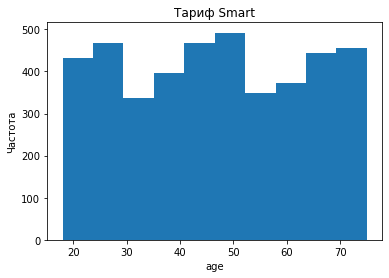

In [2770]:
def_analis('Smart',df_smart,'age')


Наиболее частое значение и его частота
age
63    72
Name: age, dtype: int64



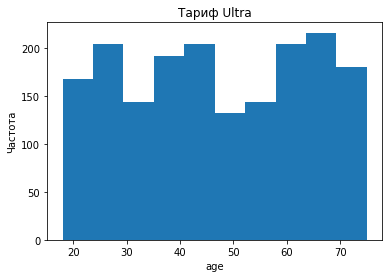

In [2771]:
def_analis('Ultra',df_ultra,'age')


### **Зарегистрированные пользователи**

Наиболее частое значение и его частота
reg_date
7    444
Name: reg_date, dtype: int64



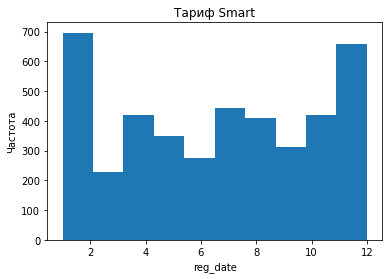

In [2772]:
def_analis('Smart',df_smart,'reg_date')


Наиболее частое значение и его частота
reg_date
4    216
Name: reg_date, dtype: int64



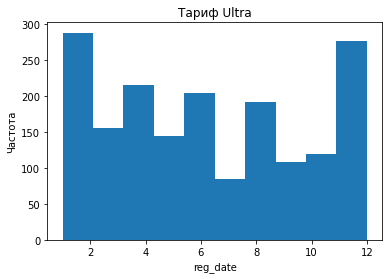

In [2773]:
def_analis('Ultra',df_ultra,'reg_date')


### **Ушедшие пользователи**

Наиболее частое значение и его частота
churn_date
12    120
Name: churn_date, dtype: int64



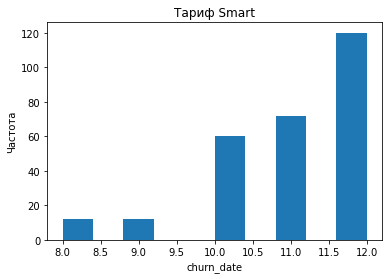

In [2774]:
def_analis('Smart',df_smart.query('churn_date < 13'),'churn_date')


Наиболее частое значение и его частота
churn_date
12    72
Name: churn_date, dtype: int64



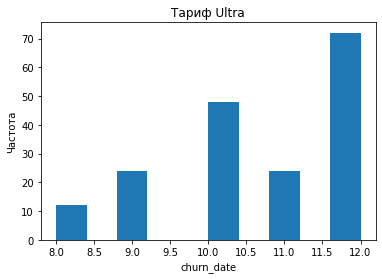

In [2775]:
def_analis('Ultra',df_ultra.query('churn_date < 13'),'churn_date')


### Функция расчета и вывода результатов анализа.

In [2776]:
# Функция расчета и вывода результатов анализа.
def print_result(name,series):
    print()
    print('-------------------------------------','Сколько',name,'требуется пользователям.''-------------------------------------')
    median = series.median()
    mean = series.mean()
    variance = np.var(series, ddof=1)
    standard_deviation = np.std(series, ddof=1)
    simga_rule_up = int(mean + 3*standard_deviation)
    
    if median < mean:
        bevel = 'Ассиметричный датасет: положительная скошенность.'
    elif median > mean:
        bevel = 'Ассиметричный датасет: отрицательная скошенность.'
    else:
        'Симметричный датасет.'
    
    series.hist()
    print()
    print('Медиана:',median)
    print('Cреднее количество:',mean)
    print('Дисперсия:',variance)
    print('Стандартное отклонение:',standard_deviation)
    print()
    print(bevel)
    print()
    print('Вывод: пользователям требуется',simga_rule_up,name+'.')


## **Тариф «Смарт»**


------------------------------------- Сколько минут разговора требуется пользователям.-------------------------------------

Медиана: 105.5
Cреднее количество: 221.1721272554606
Дисперсия: 62692.08126519414
Стандартное отклонение: 250.38386782137968

Ассиметричный датасет: положительная скошенность.

Вывод: пользователям требуется 972 минут разговора.


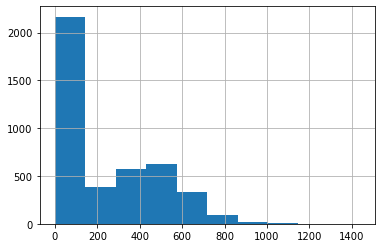

In [2777]:
print_result('минут разговора',df_smart['sum_minutes_calls'])



------------------------------------- Сколько сообщений требуется пользователям.-------------------------------------

Медиана: 0.0
Cреднее количество: 17.66690408357075
Дисперсия: 699.3250217119872
Стандартное отклонение: 26.44475414353454

Ассиметричный датасет: положительная скошенность.

Вывод: пользователям требуется 97 сообщений.


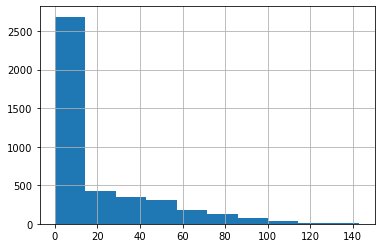

In [2778]:
print_result('сообщений',df_smart['count_sms'])



------------------------------------- Сколько гб интернет-трафика требуется пользователям.-------------------------------------

Медиана: 6.0
Cреднее количество: 8.641263057929725
Дисперсия: 83.92138410841636
Стандартное отклонение: 9.160861537454672

Ассиметричный датасет: положительная скошенность.

Вывод: пользователям требуется 36 гб интернет-трафика.


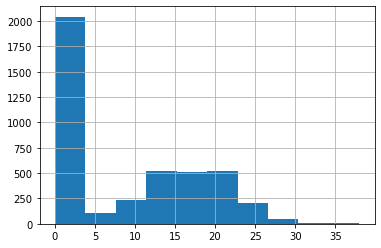

In [2779]:
print_result('гб интернет-трафика',df_smart['sum_gb'])


## **Тариф «Ультра»**


------------------------------------- Сколько минут разговора требуется пользователям.-------------------------------------

Медиана: 92.0
Cреднее количество: 290.1140939597315
Дисперсия: 124198.47942072229
Стандартное отклонение: 352.41804638911765

Ассиметричный датасет: положительная скошенность.

Вывод: пользователям требуется 1347 минут разговора.


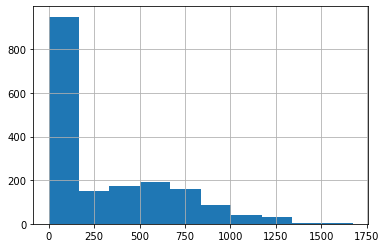

In [2780]:
print_result('минут разговора',df_ultra['sum_minutes_calls'])



------------------------------------- Сколько сообщений требуется пользователям.-------------------------------------

Медиана: 0.0
Cреднее количество: 27.19407158836689
Дисперсия: 1861.5801103295319
Стандартное отклонение: 43.14603238224266

Ассиметричный датасет: положительная скошенность.

Вывод: пользователям требуется 156 сообщений.


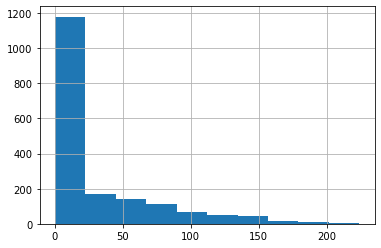

In [2781]:
print_result('сообщений',df_ultra['count_sms'])



------------------------------------- Сколько гб интернет-трафика требуется пользователям.-------------------------------------

Медиана: 6.0
Cреднее количество: 10.739373601789708
Дисперсия: 147.53919871205125
Стандартное отклонение: 12.146571479724278

Ассиметричный датасет: положительная скошенность.

Вывод: пользователям требуется 47 гб интернет-трафика.


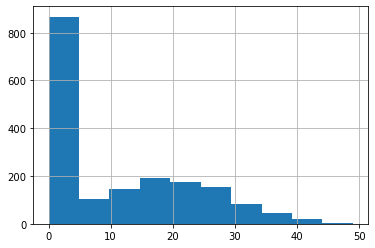

In [2782]:
print_result('гб интернет-трафика',df_ultra['sum_gb'])


## Заключение

In [2783]:
display(df_tariffs[['messages_included','gb_per_month_included','minutes_included','tariff']])


,messages_included,gb_per_month_included,minutes_included,tariff
0,50,15,500,smart
1,1000,30,3000,ultra


**Тариф «Смарт»:**
- В основном пользователи 40 лет,
- Число регистраций растет,
- Растет отток пользователей.
- **Для тарифа «Смарт» требуется:** 
- - 972 минуты разговора, 
- - 97 сообщений, 
- - 36 гб интернет-трафика.

**Тариф «Ультра»:**
- В основном пользователи 60 лет,
- Число регистраций падает,
- Растет отток пользователей.
- **Для тарифа «Ультра» требуется:**
- - 1347 минут разговора,
- - 156 сообщений,
- - 47 гб интернет-трафика.

# Проверка гипотез

## Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [2784]:
print('Размер данных Смарт:',len(df_smart))
print('Размер данных Ультра:',len(df_ultra))


Размер данных Смарт: 4212
Размер данных Ультра: 1788


Проверим гипотезу равенства.

H0: P0 = P

H1: P0 != P

In [2785]:
sample_smart = df_smart[0:1788]['earnings']
sample_ultra = df_ultra['earnings']

print('Дисперсия sample_smart:',np.var(sample_smart))
print('Дисперсия sample_ultra:',np.var(sample_ultra))


Дисперсия sample_smart: 750041.7446671047
Дисперсия sample_ultra: 1142982.3543984431


In [2786]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(sample_smart,sample_ultra, equal_var = False)# гипотеза о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue)# p-значение

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 8.014223932424021e-44
Отвергаем нулевую гипотезу


In [2787]:
print('Cредняя выручка c пользователей smart:',sample_smart.mean())
print('Cредняя выручка c пользователей ultra:',sample_ultra.mean())


Cредняя выручка c пользователей smart: 666.8439597315436
Cредняя выручка c пользователей ultra: 1125.1677852348994


## Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [2788]:
print('Размер данных Москвы:',len(df.query('city in "Москва"')))
print('Размер данных Других городов:',len(df.query('city not in "Москва"')))


Размер данных Москвы: 1188
Размер данных Других городов: 4812


Проверим гипотезу равенства.

H0: P0 = P

H1: P0 != P

In [2789]:
sample_moscow = df.query('city in "Москва"')['earnings']
sample_another = df.query('city not in "Москва"')[0:1188]['earnings']

print('Дисперсия sample_moscow:',np.var(sample_moscow))
print('Дисперсия sample_another:',np.var(sample_another))


Дисперсия sample_moscow: 889091.4735230927
Дисперсия sample_another: 1141192.9267421828


In [2790]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(sample_moscow,sample_another, equal_var = False)# гипотеза о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue)# p-значение

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 6.28282586593862e-16
Отвергаем нулевую гипотезу


In [2791]:
print('Cредняя выручка c пользователей из Москвы:',sample_moscow.mean())
print('Cредняя выручка c пользователей из других регионов:',sample_another.mean())


Cредняя выручка c пользователей из Москвы: 787.7878787878788
Cредняя выручка c пользователей из других регионов: 1124.4949494949494


## Заключение:

**Гипотеза 1:** Двухсторонняя теория независимых данных. Определили нулевую гипотезу как равенство, а альтернативную как неравенство. Дисперсии не равны. Взяли все данные тарифа Ультра и выборку тарифа Смарт равную по количеству данных.

**Гипотеза 2:** Двухсторонняя теория независимых данных. Определили нулевую гипотезу как равенство, а альтернативную как неравенство. Дисперсии не равны. Взяли все данные по Москве и выборку по другим городам равную по количеству данных.

- Отвергаем нулевую гипотезу. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Выручка «Ультра» больше.
- Отвергаем нулевую гипотезу. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. В других регионах выручка больше.

# Общий вывод

**Лучший тариф: «Ультра»**
- средний пользователь : Регионы (не Москва),  60 лет;
- Число регистраций падает. Отток растет, но медленее чем в тарифе Смарт;
- Тарифы не равны, выручка тарифа Ультра больше;
- Клиенты реже выходят за пределы лимита тарифного плана;
- Пользователям требуется больше интернета;
- Размер выручки в городах разный. Средняя выручка выше в других регионах, чем в Москве.